___

In [1]:
# Import libraries to be used

# Warning messages display
## import warnings
## warnings.filterwarnings(action='ignore') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
pd.set_option('display.max_rows', 100) # If too high, it greatly slows down the output display and freezes the kernel


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
%load_ext memory_profiler

In [3]:
t0 = time.perf_counter() 

In [4]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


___

In [5]:
cols = [
    
### -----  < X > (PRE-FLIGHT DATA) -----

# Time Period
#  'YEAR', # Disregarded: for the time being, analysis limted to 2019
#  'QUARTER', # Disregarded: redundant
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
#  'FL_DATE', # Disregarded: redundant
# Airline / Aircraft
 'OP_UNIQUE_CARRIER',
#  'OP_CARRIER_AIRLINE_ID', # Disregarded: redundant
#  'OP_CARRIER', # Disregarded: redundant
 'TAIL_NUM',
#  'OP_CARRIER_FL_NUM', # Unknown in advance?
# Origin
#  'ORIGIN_AIRPORT_ID', # Disregarded: redundant
#  'ORIGIN_AIRPORT_SEQ_ID', # Disregarded: redundant
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
#  'ORIGIN_CITY_NAME', # Disregarded: redundant
#  'ORIGIN_STATE_ABR', # Disregarded: redundant
#  'ORIGIN_STATE_FIPS', # Federal Information Processing Standards # Not used for the moment
#  'ORIGIN_STATE_NM', # Disregarded: redundant
#  'ORIGIN_WAC', # World Area Code # Not used for the moment
# Destination
#  'DEST_AIRPORT_ID', # Disregarded: redundant
#  'DEST_AIRPORT_SEQ_ID', # Disregarded: redundant
 'DEST_CITY_MARKET_ID',
 'DEST',
#  'DEST_CITY_NAME', # Disregarded: redundant
#  'DEST_STATE_ABR', # Disregarded: redundant
#  'DEST_STATE_FIPS', # Federal Information Processing Standards # Not used for the moment
#  'DEST_STATE_NM', # Disregarded: redundant
#  'DEST_WAC', # World Area Code # Not used for the moment
# Departure Performance
 'CRS_DEP_TIME',
#  'TAXI_OUT_median', #  Output / However, the median for each airport could be used as input !! (explanation below)   
# Arrival Performance
 'CRS_ARR_TIME',
#  'TAXI_IN_median', #  Output / However, the median for each airport could be used as input !! (explanation below) 
# Flight Summaries
 'CRS_ELAPSED_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',

### ----- < y > (PRE-FLIGHT DATA) -----

# Departure Performance
#  'DEP_TIME', # Disregarded: redundant
#  'DEP_DELAY', # Disregarded: other potentially useful target
#  'DEP_DELAY_NEW', # Disregarded: redundant
#  'DEP_DEL15', # Disregarded: other potentially useful target
#  'DEP_DELAY_GROUP', # Disregarded: not relevant for this particular analysis
#  'DEP_TIME_BLK', # Disregarded: redundant
#  'TAXI_OUT', #  Output / However, the median for each airport could be used as input !! (explanation below)
#  'WHEELS_OFF', # Disregarded: redundant
# Arrival Performance
#  'WHEELS_ON', # Disregarded: redundant
#  'TAXI_IN', #  Output / However, the median for each airport could be used as input !! (explanation below)
#  'ARR_TIME', # Disregarded: redundant
#  'ARR_DELAY', # -------------------------------------------> MAIN TARGET !! (i.e. < y >)
#  'ARR_DELAY_NEW', # Disregarded: redundant
 'ARR_DEL15', # Disregarded: other potentially useful target
#  'ARR_DELAY_GROUP', # Disregarded: not relevant for this particular analysis
#  'ARR_TIME_BLK', # Disregarded: redundant
# Cancellations and Diversions
#  'CANCELLED', # Disregarded: not relevant for this particular analysis
#  'CANCELLATION_CODE', # Disregarded: not relevant for this particular analysis
#  'DIVERTED', # Disregarded: not relevant for this particular analysis
# Flight Summaries
#  'ACTUAL_ELAPSED_TIME', # Disregarded: redundant
#  'AIR_TIME', # Disregarded: redundant
# Cause of Delay
#  'CARRIER_DELAY', # Disregarded: other potentially useful target
#  'WEATHER_DELAY', # Disregarded: other potentially useful target
#  'NAS_DELAY', # Disregarded: other potentially useful target
#  'SECURITY_DELAY', # Disregarded: other potentially useful target
#  'LATE_AIRCRAFT_DELAY', # Disregarded: other potentially useful target
# Gate Return Information at Origin Airport (Data starts 10/2008)
#  'FIRST_DEP_TIME', # Disregarded: not relevant for this particular analysis
#  'TOTAL_ADD_GTIME', # Disregarded: not relevant for this particular analysis
#  'LONGEST_ADD_GTIME', # Disregarded: not relevant for this particular analysis
# Diverted Airport Information (Data starts 10/2008)
#  'DIV_AIRPORT_LANDINGS', # Disregarded: not relevant for this particular analysis
]

In [6]:
cols

['MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'OP_UNIQUE_CARRIER',
 'TAIL_NUM',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'CRS_DEP_TIME',
 'CRS_ARR_TIME',
 'CRS_ELAPSED_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',
 'ARR_DEL15']

In [7]:
preprocessed_input_csv_path = os.path.join(root,
                                           "Output_Data",
                                           "US_DoT",
                                           "OTP_AC_Preprocessed.csv")
preprocessed_input_csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT\\OTP_AC_Preprocessed.csv'

In [8]:
%%time

df = pd.read_csv(preprocessed_input_csv_path,
                 encoding='latin1',
#                  nrows=1e4,
#                  usecols=cols, # This way, the extra column is disregarded for the loading process
                 low_memory = False)

Wall time: 13.1 s


In [9]:
df.shape

(3997493, 24)

In [10]:
df = df.sample(int(1e4))

In [11]:
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_CITY_MARKET_ID,DEST,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,TAIL_NUMBER,MANUFACTURER,MODEL_2,AC_FAMILY,CAPACITY_IN_POUNDS,NUMBER_OF_SEATS,MANUFACTURE_YEAR,ACQUISITION_YEAR
1005983,4,28,7,WN,N926WN,34100,PHL,31454,MCO,630,900,0.0,150.0,1.0,861.0,4,N926WN,BOEING,B737-700,B737,36200.0,143.0,2008.0,2009.0
3337059,11,1,5,UA,N69824,30977,ORD,31703,EWR,805,1111,1.0,126.0,1.0,719.0,3,N69824,BOEING,B737-900,B737,187700.0,173.0,2014.0,2014.0
102387,1,6,7,UA,N78448,31453,IAH,32457,SFO,730,953,1.0,263.0,1.0,1635.0,7,N78448,BOEING,B737-900,B737,187700.0,173.0,2012.0,2012.0
3905983,12,21,6,NK,N613NK,31453,IAH,32211,LAS,1820,1942,1.0,202.0,1.0,1222.0,5,N613NK,AIRBUS,A320,A320,35600.0,178.0,2012.0,2012.0
3969105,12,28,6,DL,N855DN,32211,LAS,33105,CVG,2245,522,0.0,217.0,1.0,1678.0,7,N855DN,BOEING,B737-900,B737,47800.0,180.0,2016.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489848,5,14,2,WN,N8510E,34100,PHL,31123,STL,810,940,0.0,150.0,1.0,814.0,4,N8510E,BOEING,B737-800,B737,43800.0,175.0,2016.0,2016.0
2410657,8,19,1,DL,N366DX,30721,BOS,30397,ATL,1500,1751,1.0,171.0,1.0,946.0,4,N366DX,AIRBUS,A321,A320,52301.0,191.0,2019.0,2019.0
1163424,4,24,3,UA,N77539,33495,MSY,30977,ORD,1748,2025,0.0,157.0,1.0,836.0,4,N77539,BOEING,B737-800,B737,174200.0,154.0,2017.0,2017.0
3720788,12,12,4,UA,N498UA,31986,GRR,30325,DEN,1645,1745,0.0,180.0,1.0,1015.0,5,N498UA,AIRBUS,A320,A320,169700.0,142.0,2002.0,2002.0


In [12]:
df.dtypes

MONTH                      int64
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
TAIL_NUM                  object
ORIGIN_CITY_MARKET_ID      int64
ORIGIN                    object
DEST_CITY_MARKET_ID        int64
DEST                      object
CRS_DEP_TIME               int64
CRS_ARR_TIME               int64
ARR_DEL15                float64
CRS_ELAPSED_TIME         float64
FLIGHTS                  float64
DISTANCE                 float64
DISTANCE_GROUP             int64
TAIL_NUMBER               object
MANUFACTURER              object
MODEL_2                   object
AC_FAMILY                 object
CAPACITY_IN_POUNDS       float64
NUMBER_OF_SEATS          float64
MANUFACTURE_YEAR         float64
ACQUISITION_YEAR         float64
dtype: object

### Feature analysis

[Dealing with categorical features with high cardinality: Target Encoding](https://medium.com/@kr.vishwesh54/dealing-with-categorical-features-with-high-cardinality-target-encoding-baa9298bf257)

In [13]:
X = df.drop('ARR_DEL15', axis=1)
X.sample(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_CITY_MARKET_ID,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,TAIL_NUMBER,MANUFACTURER,MODEL_2,AC_FAMILY,CAPACITY_IN_POUNDS,NUMBER_OF_SEATS,MANUFACTURE_YEAR,ACQUISITION_YEAR
2032725,7,2,2,NK,N620NK,31703,LGA,31135,MYR,1230,1431,121.0,1.0,563.0,3,N620NK,AIRBUS,A320,A320,35600.0,178.0,2013.0,2013.0
1579945,5,18,6,AA,N188US,30194,DFW,30721,BOS,700,1141,221.0,1.0,1562.0,7,N188US,AIRBUS,A321,A320,51000.0,187.0,2002.0,2002.0
493130,2,9,6,DL,N364NW,30194,DAL,30397,ATL,700,955,115.0,1.0,721.0,3,N364NW,AIRBUS,A320,A320,36952.0,157.0,1999.0,1999.0
1307028,5,7,2,WN,N403WN,30436,TUS,30325,DEN,650,940,110.0,1.0,639.0,3,N403WN,BOEING,B737-700,B737,36200.0,143.0,2001.0,2001.0
761466,3,14,4,NK,N690NK,32211,LAS,34057,PDX,2045,2308,143.0,1.0,763.0,4,N690NK,AIRBUS,A320,A320,35600.0,182.0,2018.0,2018.0


In [14]:
y = df['ARR_DEL15']
y.sample(5)

2950350    0.0
317004     0.0
1853541    0.0
755021     0.0
190083     0.0
Name: ARR_DEL15, dtype: float64

___

In [15]:
%memit

peak memory: 141.02 MiB, increment: 0.20 MiB


### A Simple Guide to Scikit-learn Pipelines

#### Transformers

Before building the pipeline, let's split the data into a train and test set so that the performance of the model can be validated.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

1. The first step in building the pipeline is to define each transformer type.

In [17]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

Wall time: 181 ms


2. Next, let's use the ColumnTransformer to apply the transformations to the correct columns in the dataframe. Before building this, the numeric and categorical columns shall be listed.

In [18]:
%%time

numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(['ARR_DEL15'], axis=1).columns
categorical_features = df.select_dtypes(include=['object']).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Wall time: 15.6 ms


#### Fitting the classifier

The next step is to create a pipeline that combines the preprocessor created above with a classifier. In this case a simple RandomForestClassifier has been used to start with.

In [19]:
%%time

from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=0))])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Wall time: 6.45 s


#### Model selection

**A pipeline can also be used during the model selection process**. The following example code loops through a number of scikit-learn classifiers applying the transformations and training the model.

In [20]:
%%time

from sklearn.metrics import accuracy_score, log_loss, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, random_state=0),
#     NuSVC(probability=True), # ValueError: b'specified nu is infeasible'
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    AdaBoostClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0)
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    
    # TEST !!!     
    predictions = pipe.predict(X_test)
    print(f1_score(y_test, predictions), recall_score(y_test, predictions), precision_score(y_test, predictions), accuracy_score(y_test, predictions))
    
    print("model score: %.3f \n" % pipe.score(X_test, y_test))

KNeighborsClassifier(n_neighbors=3)
0.18604651162790697 0.14358974358974358 0.2641509433962264 0.755
model score: 0.755 

SVC(C=0.025, probability=True, random_state=0)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0 0.0 0.0 0.805
model score: 0.805 

DecisionTreeClassifier(random_state=0)
0.21770682148040638 0.19230769230769232 0.2508361204013378 0.7305
model score: 0.731 

RandomForestClassifier(random_state=0)
0.0 0.0 0.0 0.802
model score: 0.802 

AdaBoostClassifier(random_state=0)
0.05176470588235294 0.028205128205128206 0.3142857142857143 0.7985
model score: 0.798 

GradientBoostingClassifier(random_state=0)
0.02977667493796526 0.015384615384615385 0.46153846153846156 0.8045
model score: 0.804 

Wall time: 53.3 s


**The pipeline can also be used in grid search** to find the best performing parameters. To do this, let's first create a parameter grid for the chosen model.

*One important thing to note is that there is a need to append the name given to the classifier part of the pipeline to each parameter name. In the code above its name is ‘classifier’ so 'classifier__' has been added to each parameter.*

Next a grid search object has been created, which includes the original pipeline. When fit is called, the transformations are applied to the data, before a cross-validated grid-search is performed over the parameter grid.

In [21]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [22]:
%%time

param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8],
    'classifier__criterion' :['gini', 'entropy']}
from sklearn.model_selection import GridSearchCV
# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
scoring = {'AUC': 'roc_auc', 'F1': 'f1', 'Precision': 'precision',
           'Recall': 'recall', 'Accuracy': 'accuracy'}
CV = GridSearchCV(rf, param_grid, n_jobs= 1, scoring=scoring, refit='AUC') # change the scorer metric
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

{'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__max_features': 'auto', 'classifier__n_estimators': 500}
0.629406332285921
Wall time: 6min 58s


In [23]:
predictions = CV.predict(X_test)
probabilities = CV.predict_proba(X_test)

### [Classification Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

- Binary classification (only):
    - [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve): Compute precision-recall pairs for different probability thresholds.
        - The precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives. The **precision** is intuitively the ability of the classifier **not to label as positive a sample that is negative**.
        - The recall is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives. The **recall** is intuitively the ability of the classifier to **find all the positive samples**.

    ### RECALL could be a potentially strong metric for this case; "from all the flights classified as delayed, the actual (true) number delyed flights is as high as possible."

    - [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve): A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.
        
- Multi-class classification (or binary):
    - [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix): Compute confusion matrix to evaluate the accuracy of a classification.
    ![IMG_Confusion_Matrix](https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_0011.png)
    - [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score): Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

- Multi-label classification (or binary or multi-class):
    - [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score): Accuracy classification score.
        - It is the ratio of number of correct predictions to the total number of input samples.
        - **It works well only if there are equal number of samples belonging to each class.**
    - [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report): Build a text report showing the main classification metrics.
    - [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score): Compute the F1 score, also known as balanced F-score or F-measure.
        - The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal: `F1 = 2 * (precision * recall) / (precision + recall)`
    - [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
    - [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

### Which metric should be used then?
##### Bear in mind that it's a clear case of imbalanced data

Nomenclature:
- Delayed = Positive
- On-time = Negative 

Considering this:
- False positive (Type I error) → Wrongly classifying an On-time flight as a Delayed flight → Not significantly relevant
- **False negative (Type II error) → Wrongly classifying a Delayed flight as an On-time flight → Highly relevant**

**F-beta** score (\$ F_\beta \$):
![F-beta score](https://wikimedia.org/api/rest_v1/media/math/render/svg/136f45612c08805f4254f63d2f2524bc25075fff)

Two commonly used values for β are:
- **2 : weighs recall higher than precision**
- 0.5 : weighs recall lower than precision.


*Probably most people in the industry would accept that an **OTP of 80%* or above is pretty good**. That’s 4 in 5 flights arriving within 15 minutes of their scheduled arrival time. The very best airlines and airports succeed in punctuality closer to 90% - but they remain the exception rather than the rule.* (Source: [OAG](https://www.oag.com/on-time-performance-airlines-airports))

The actual data from the 7268232 records comprising the OTP dataset accurately confirm this hypothesis:
```
Delays: 5878979 (80.89%)
On-time: 1389253 (19.11%)
```

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0, 0.0, 0.805)

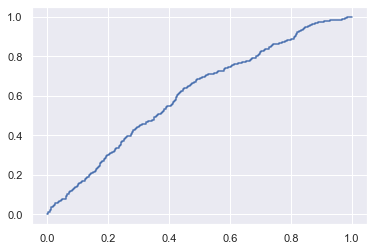

In [24]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score

tpr, fpr, thresolds = roc_curve(y_test, probabilities[:, 1])
plt.plot(tpr, fpr)
f1_score(y_test, predictions), recall_score(y_test, predictions), precision_score(y_test, predictions), accuracy_score(y_test, predictions)